<a href="https://colab.research.google.com/github/KaruraM/ANALYSIS/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_colwidth", 50)

In [4]:
# Loading the dataset
df = pd.read_csv("https://bit.ly/FinancialDataset")
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Loading the variable definitions dataset
VarDef = pd.read_csv("https://bit.ly/VariableDefinitions")
VarDef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
df.shape # Gives the total no. of entries and columns

(23524, 13)

In [7]:
df.info() # number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
df.describe()      # Only 3 columns contain numerals, the other 10 contain strings
                   # Gives summary statistics of all the numerical columns excluding NaN values

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [9]:
df.isnull().any() # Returns a Boolean value(True/False) of whether a null value exists in that column or not

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [10]:
df.isnull().sum() # Returns the total no. of missing values per column

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
MissingV=df.isnull().sum() # Percentage of missing values
MissingV[MissingV>0]/len(df)*100

country                   0.059514
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64

In [12]:
df.drop(['The relathip with head','marital_status'], axis=1, inplace = True) # These columns have null values that cannot be assumed until another survey is done. 
                                                                   # They have other complimenting columns necessary for the analysis of the data collected

In [13]:
Country = pd.isnull(df["country"]) # Shows all the null entries in the 'country' column
df[Country].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Primary education,Remittance Dependent
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Primary education,Self employed
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Primary education,No Income
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,No formal education,Self employed
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,No formal education,Self employed


In [14]:
# From the result, all the null values in the 'country' column correspond with the year 2017, the year that the survey was done in Tanzania
# Thus the nulls will be filled with the value 'Tanzania'
df1 = df["country"].fillna('Tanzania', inplace = True)

In [15]:
Country = pd.isnull(df["country"]) # Confirming that there are no more nulls in the country column
df[Country]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job


In [16]:
Account = pd.isnull(df["Has a Bank account"]) # Shows all the null entries in the 'Has a Bank account' column
df[Account].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
16948,Tanzania,2017,uniqueid_2146,NaN,NaN,NaN,1.0,65.0,Female,Primary education,Informally employed
16949,Tanzania,2017,uniqueid_2147,NaN,NaN,NaN,2.0,27.0,Male,Tertiary education,Informally employed
16950,Tanzania,2017,uniqueid_2148,NaN,NaN,NaN,1.0,36.0,Male,Primary education,Self employed
16951,Tanzania,2017,uniqueid_2149,NaN,NaN,NaN,2.0,30.0,Female,No formal education,Informally employed
18082,Tanzania,2017,uniqueid_3280,NaN,NaN,NaN,2.0,32.0,Female,Primary education,Self employed


In [17]:
# From the gathered statistics and surveys, the major group of Tanzanians is self-employed and many of them together with the informally employed, the no income persons  and other employmentlack a bank account thus it is okay to fill all the null values in that column with 'no'
df1 = df["Has a Bank account"].fillna('No', inplace = True)


In [18]:
Location = pd.isnull(df["Type of Location"]) # Shows all the null entries in the 'Type of Location' column
df[Location].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
16427,Tanzania,2017,uniqueid_1625,No,NaN,Yes,2.0,20.0,Male,No formal education,Self employed
16451,Tanzania,2017,uniqueid_1649,No,NaN,Yes,2.0,43.0,Male,No formal education,Informally employed
16513,Tanzania,2017,uniqueid_1711,No,NaN,No,1.0,49.0,Female,Primary education,Self employed
16582,Tanzania,2017,uniqueid_1780,No,NaN,Yes,1.0,36.0,Female,Primary education,Self employed
16948,Tanzania,2017,uniqueid_2146,No,NaN,NaN,1.0,65.0,Female,Primary education,Informally employed


In [19]:
# From the survey and data collected, majority of the Tanzanians with the highest level of education as Primary School are either self-employed or are in the informal employment category and live in the rural areas.
# majority of those with no formal education also reside in the rural areas
# Moreso, majority of those with tertiary education as their highest level of education have informal employment and reside in the rural areas.
# With all these conclusions it is wise to fill all the nulls in this column with 'Rural'
df1 = df["Type of Location"].fillna('Rural', inplace = True)


In [20]:
Phone = pd.isnull(df["Cell Phone Access"]) # Shows all the null entries in the 'Cell Phone Access' column
df[Phone].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
16948,Tanzania,2017,uniqueid_2146,No,Rural,NaN,1.0,65.0,Female,Primary education,Informally employed
16949,Tanzania,2017,uniqueid_2147,No,Rural,NaN,2.0,27.0,Male,Tertiary education,Informally employed
16950,Tanzania,2017,uniqueid_2148,No,Rural,NaN,1.0,36.0,Male,Primary education,Self employed
16951,Tanzania,2017,uniqueid_2149,No,Rural,NaN,2.0,30.0,Female,No formal education,Informally employed
17213,Tanzania,2017,uniqueid_2411,No,Rural,NaN,1.0,82.0,Female,No formal education,Remittance Dependent


In [21]:
df1 = df["Cell Phone Access"].fillna('No', inplace = True) # Most of the people living in the rural areas of Tanzania with no formal education
                                                           # or have primary education as their highest level of education do not have access to a phone according to the survey

In [22]:
Size = pd.isnull(df["household_size"]) # Shows all the null entries in the 'household_size' column
df[Size].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
13279,Rwanda,2016,uniqueid_7212,No,Rural,Yes,NaN,27.0,Female,Primary education,Informally employed
13280,Rwanda,2016,uniqueid_7213,No,Rural,Yes,NaN,78.0,Female,No formal education,Farming and Fishing
13281,Rwanda,2016,uniqueid_7214,No,Rural,Yes,NaN,35.0,Male,No formal education,Informally employed
13282,Rwanda,2016,uniqueid_7215,No,Rural,Yes,NaN,55.0,Male,No formal education,Informally employed
13371,Rwanda,2016,uniqueid_7304,No,Rural,No,NaN,21.0,Female,Primary education,Informally employed


In [23]:
df.mode()['household_size'][0] # Getting the the entry with the highest frequency in the 'household size' column

2.0

In [24]:
df1 = df["household_size"].fillna(2.0, inplace = True) # Replaces the null values in the 'household size' column with the mode

In [25]:
Age = pd.isnull(df["Respondent Age"]) # Shows all the null entries in the 'Respondent Age' column
df[Age].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,NaN,NaN,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,NaN,NaN,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,NaN,NaN,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,NaN,NaN,Primary education,Farming and Fishing
7281,Rwanda,2016,uniqueid_1214,No,Rural,Yes,4.0,NaN,Male,Primary education,Informally employed


In [26]:
df.mode()['Respondent Age'][0]


30.0

In [27]:
df1 = df["Respondent Age"].fillna(30.0, inplace = True)

In [28]:
Gender = pd.isnull(df["gender_of_respondent"]) # Shows all the null entries in the 'gender_of_respondent' column
df[Gender].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,30.0,NaN,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,30.0,NaN,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,30.0,NaN,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,30.0,NaN,Primary education,Farming and Fishing
16434,Tanzania,2017,uniqueid_1632,No,Urban,No,2.0,50.0,NaN,No formal education,Self employed


In [29]:
df1 = df["gender_of_respondent"].fillna('Female', inplace = True) # Logically majority of the population comprises of the female gender

In [30]:
Education = pd.isnull(df["Level of Educuation"]) # Shows all the null entries in the 'Level of Educuation' column
df[Education].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
13461,Rwanda,2016,uniqueid_7394,No,Rural,No,1.0,74.0,Male,NaN,NaN
13462,Rwanda,2016,uniqueid_7395,No,Rural,Yes,4.0,31.0,Female,NaN,NaN
13463,Rwanda,2016,uniqueid_7396,No,Rural,Yes,3.0,53.0,Female,NaN,NaN
13464,Rwanda,2016,uniqueid_7397,No,Rural,Yes,5.0,63.0,Male,NaN,NaN
13465,Rwanda,2016,uniqueid_7398,No,Urban,Yes,3.0,49.0,Female,NaN,NaN


In [31]:
df1 = df["Level of Educuation"].fillna('None', inplace = True)


In [32]:
Job = pd.isnull(df["Type of Job"]) # Shows all the null entries in the 'Type of Job' column
df[Job].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
13461,Rwanda,2016,uniqueid_7394,No,Rural,No,1.0,74.0,Male,None,NaN
13462,Rwanda,2016,uniqueid_7395,No,Rural,Yes,4.0,31.0,Female,None,NaN
13463,Rwanda,2016,uniqueid_7396,No,Rural,Yes,3.0,53.0,Female,None,NaN
13464,Rwanda,2016,uniqueid_7397,No,Rural,Yes,5.0,63.0,Male,None,NaN
13465,Rwanda,2016,uniqueid_7398,No,Urban,Yes,3.0,49.0,Female,None,NaN


In [33]:
df1 = df["Type of Job"].fillna('None', inplace = True)

In [34]:
df.isnull().any()

country                 False
year                    False
uniqueid                False
Has a Bank account      False
Type of Location        False
Cell Phone Access       False
household_size          False
Respondent Age          False
gender_of_respondent    False
Level of Educuation     False
Type of Job             False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               23524 non-null  object 
 1   year                  23524 non-null  int64  
 2   uniqueid              23524 non-null  object 
 3   Has a Bank account    23524 non-null  object 
 4   Type of Location      23524 non-null  object 
 5   Cell Phone Access     23524 non-null  object 
 6   household_size        23524 non-null  float64
 7   Respondent Age        23524 non-null  float64
 8   gender_of_respondent  23524 non-null  object 
 9   Level of Educuation   23524 non-null  object 
 10  Type of Job           23524 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


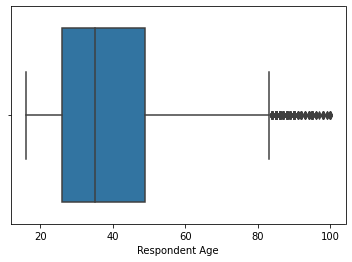

In [36]:
sns.boxplot(df["Respondent Age"]) # Finding outliers

In [37]:
Q1 = df['Respondent Age'].quantile(0.25)             # Shows the outliers in age column
Q3 = df['Respondent Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = df[(df['Respondent Age'] < Q1 - whisker_width*IQR) | (df['Respondent Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
209,Kenya,2018,uniqueid_210,No,Rural,No,3.0,95.0,Female,No formal education,Informally employed
268,Kenya,2018,uniqueid_269,No,Urban,Yes,1.0,85.0,Female,Primary education,Remittance Dependent
340,Kenya,2018,uniqueid_341,No,Rural,No,2.0,95.0,Male,Primary education,Farming and Fishing
366,Kenya,2018,uniqueid_367,No,Rural,No,1.0,86.0,Female,Primary education,Remittance Dependent
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3.0,95.0,Male,Primary education,Other Income


In [38]:
Q1 = df['Respondent Age'].quantile(0.25) # Flooring and capping,removing all the values below the 25th percentile or above the 75th percentile
Q3 = df['Respondent Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Respondent Age']=np.where(df['Respondent Age']>upper_whisker,upper_whisker,np.where(df['Respondent Age']<lower_whisker,lower_whisker,df['Respondent Age']))

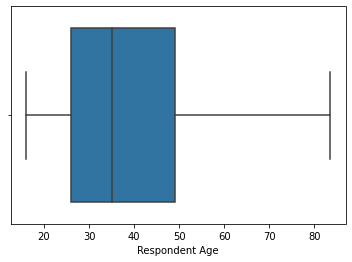

In [39]:
sns.boxplot(df['Respondent Age'],data=df) # No more outliers in the age column

In [61]:
print('skewness value of Age: ',df['Respondent Age'].skew())
print('skewness value of HS: ',df['household_size'].skew())

skewness value of Age:  0.7908019823131855
skewness value of HS:  0.7064945517017258


Skewness value should be within the range of -1 to 1 for a normal distribution, any extreme values from this value indicates the presence of outliers. The removal of outliers scaled it down to a normal distribution.

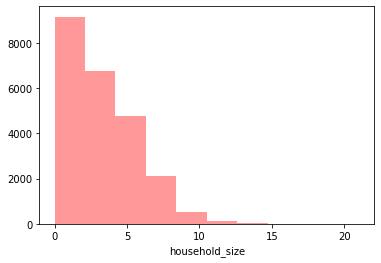

In [40]:
sns.distplot(df["household_size"],kde=False,color="red",bins=10)

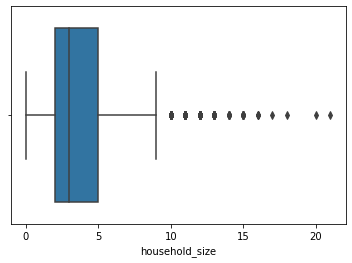

In [41]:
sns.boxplot(df["household_size"]) # Finding outliers


In [42]:
Q1 = df['household_size'].quantile(0.25)             # Shows the outliers in household size column
Q3 = df['household_size'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
HS_outliers = df[(df['household_size'] < Q1 - whisker_width*IQR) | (df['household_size'] > Q3 + whisker_width*IQR)]
HS_outliers.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
34,Kenya,2018,uniqueid_35,No,Rural,Yes,10.0,42.0,Female,Primary education,Farming and Fishing
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Other/Dont know/RTA,Informally employed
92,Kenya,2018,uniqueid_93,Yes,Urban,Yes,10.0,21.0,Female,Tertiary education,Remittance Dependent
100,Kenya,2018,uniqueid_101,No,Urban,Yes,10.0,23.0,Female,Primary education,Formally employed Private
348,Kenya,2018,uniqueid_349,No,Urban,Yes,12.0,23.0,Female,Secondary education,Self employed


In [43]:
Q1 = df['household_size'].quantile(0.25) # Flooring and capping,removing all the values below the 25th percentile or above the 75th percentile
Q3 = df['household_size'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['household_size']=np.where(df['household_size']>upper_whisker,upper_whisker,np.where(df['household_size']<lower_whisker,lower_whisker,df['household_size']))

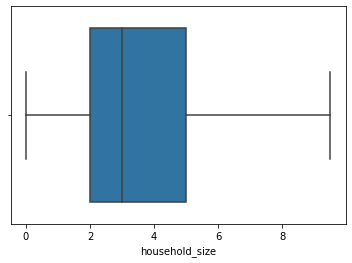

In [44]:
sns.boxplot(df['household_size'],data=df) # No more outliers in the household size column

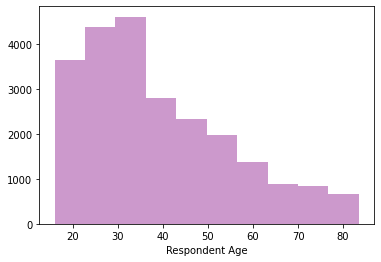

In [45]:
sns.distplot(df["Respondent Age"],kde=False,color="purple",bins=10)

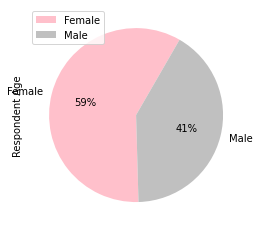

In [46]:
df.groupby(['gender_of_respondent']).sum().plot(
    kind='pie', y='Respondent Age',colors = ['pink', 'silver', 'steelblue'], autopct='%1.0f%%', startangle=60)

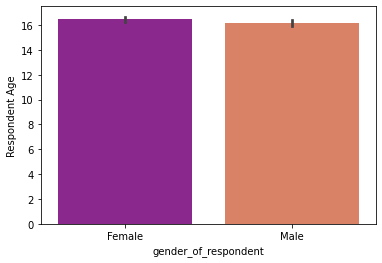

In [47]:
sns.barplot(x ='gender_of_respondent', y ='Respondent Age', data = df,
            palette ='plasma', estimator = np.std)

Majority of the respondents were female though the male gender had quite a number in the exercise. This is important for variability.

Text(0.5, 1.0, 'Bank Account Distribution')

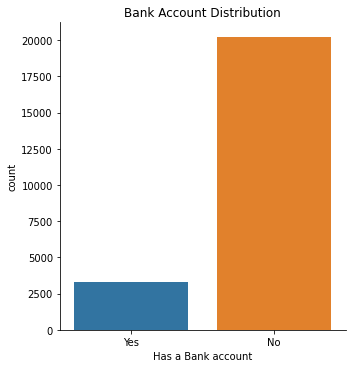

In [48]:
sns.catplot(x="Has a Bank account", kind="count", data=df)
plt.title("Bank Account Distribution")

Majority of the respondents do not have a bank account and this contributes to the lack of inclusion in many financial services. It is a problem that should be addressed.

Text(0.5, 1.0, 'Country of Respondent Distribution')

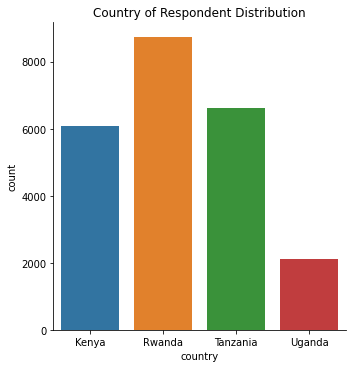

In [49]:
sns.catplot(x="country", kind="count", data=df)
plt.title("Country of Respondent Distribution")

Majority of the respondents came from Rwanda, followed by Tanzania then Kenya. The willingness of the people to take part in data collection activities has a great impact on this.Uganda had the least number of repondents.

Text(0.5, 1.0, 'Location Distribution')

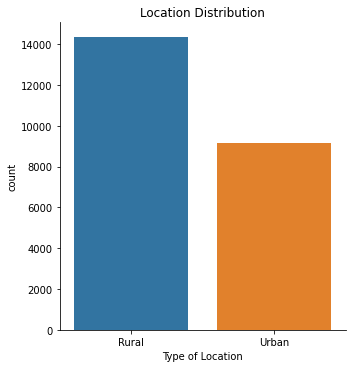

In [50]:
sns.catplot(x="Type of Location", kind="count", data=df)
plt.title("Location Distribution")

Majority of the population reside in the rural areas majorly because of their level of education as well as they job type. The few that reside in the urban areas are formally employed.

Text(0.5, 1.0, 'Cellphone Acess Distribution')

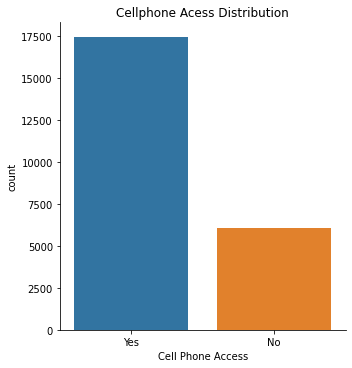

In [51]:
sns.catplot(x="Cell Phone Access", kind="count", data=df)
plt.title("Cellphone Acess Distribution")

There is no balance as most of the individuals from the survey do not have phone access thus reducing financial inclusion amongst them as this is the fastest way to access financial services.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

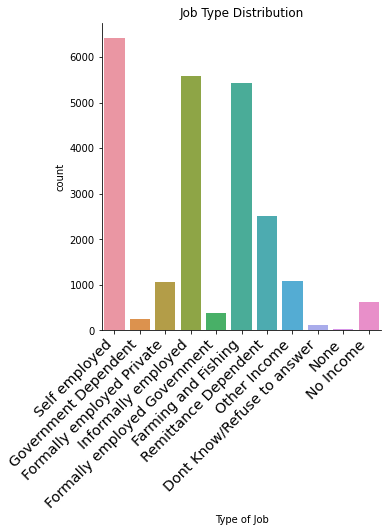

In [52]:
sns.catplot(x="Type of Job", kind="count", data=df)
plt.title("Job Type Distribution")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Most of the individuals are self employed,followed by the informally employed and the farmers/fishermen.
 A few of the population are government dependent.The none represents those who do not know or just refused to answer.